In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from category_encoders import BinaryEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.feature_selection import RFE, SequentialFeatureSelector

In [271]:
df = pd.read_csv("loan-train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [211]:
#dropping Loan_ID column entirely
columns_to_drop = ['Loan_ID']
df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [236]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [191]:
df.shape

(614, 12)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [170]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [254]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [255]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

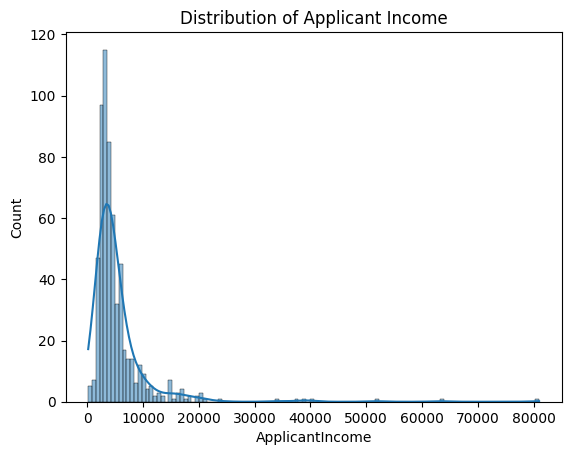

In [273]:
# Visualize distributions of key variables
sns.histplot(df['ApplicantIncome'], kde=True)
plt.title('Distribution of Applicant Income')
plt.show()

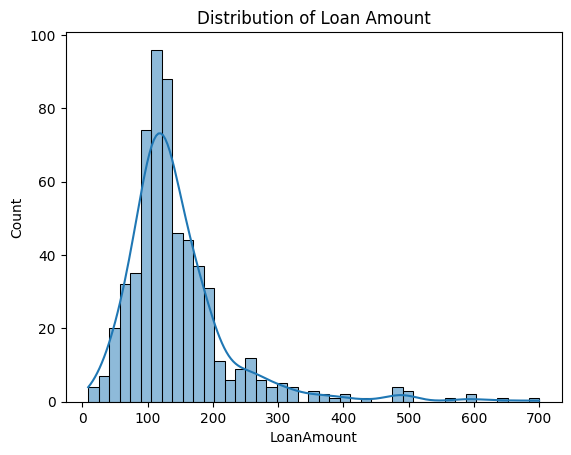

In [276]:
sns.histplot(df['LoanAmount'], kde=True)
plt.title('Distribution of Loan Amount')
plt.show()

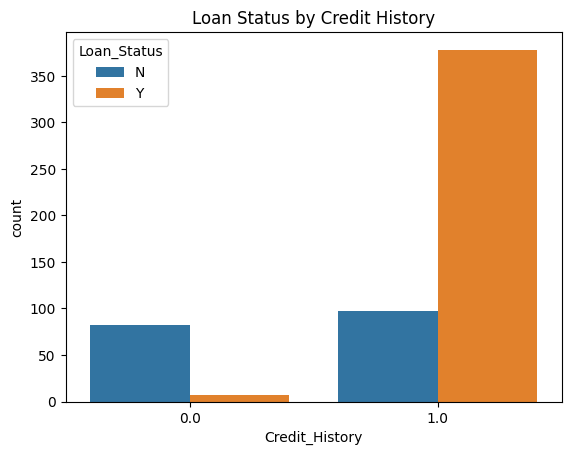

In [272]:
# Visualize the relationship between Loan_Status and Credit_History
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)
plt.title('Loan Status by Credit History')
plt.show()

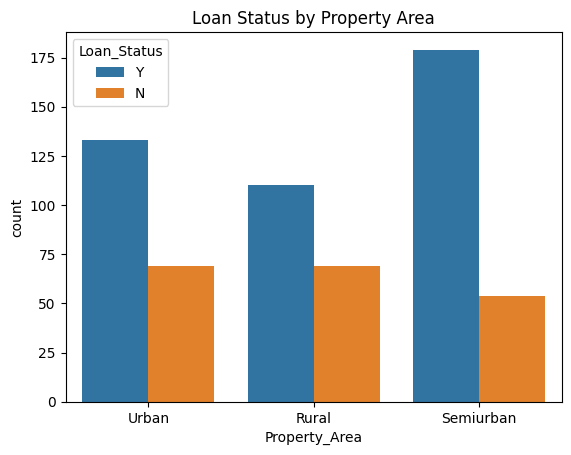

In [277]:
# Visualize the relationship between Loan_Status and Property_Area
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)
plt.title('Loan Status by Property Area')
plt.show()

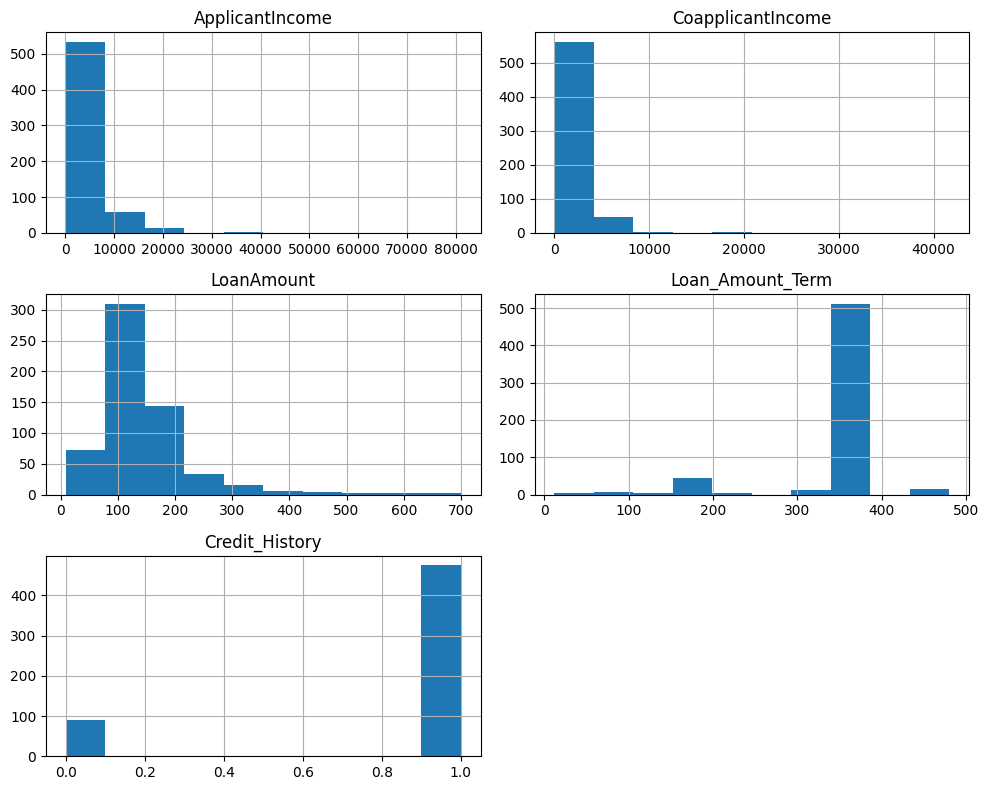

In [280]:
# Visualize distributions of numeric features
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

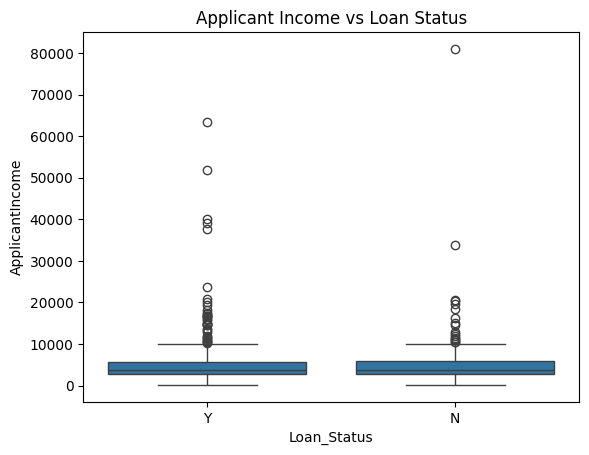

In [284]:
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.title('Applicant Income vs Loan Status')
plt.show()

In [212]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Education']= df['Education'].fillna(df['Education'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [193]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

number of people who take loan as group by gender:
Gender
Male      502
Female    112
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

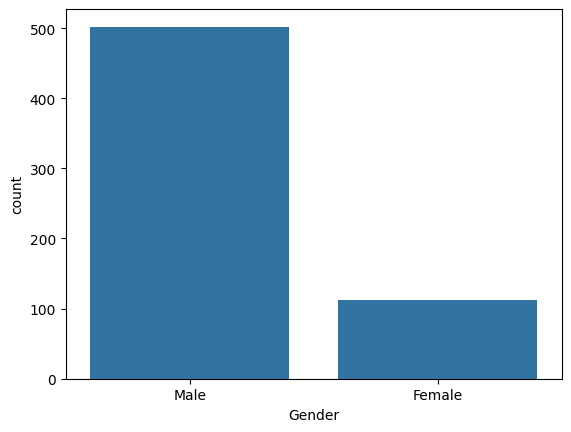

In [213]:
print("number of people who take loan as group by gender:")
print(df['Gender'].value_counts())

sns.countplot(x='Gender', data = df)

number of people who take loan as group by dependents:
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

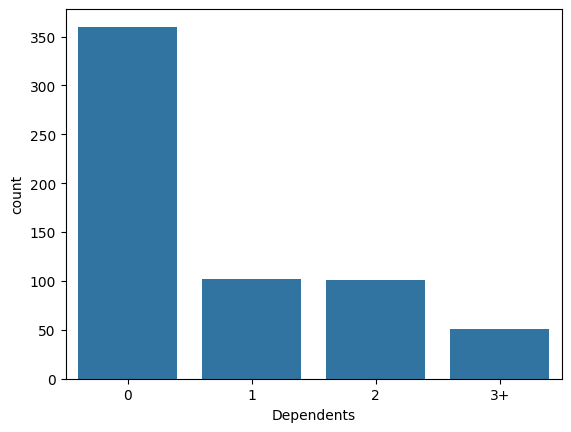

In [195]:
# Percentage of people of take loan by Dependents
print("number of people who take loan as group by dependents:")
print(df['Dependents'].value_counts())

sns.countplot(x='Dependents', data = df)

In [256]:
# Categorical Variables - Label Encoding
label_encodable_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

for col in label_encodable_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Binary Encoding for Loan Decision
df["Loan_Status"] = df["Loan_Status"].apply(lambda x: 1 if x == "Y" else 0)

In [215]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [257]:
# Standardization
standard_scalable_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Property_Area']

scaler = StandardScaler()
df[standard_scalable_cols] = scaler.fit_transform(df[standard_scalable_cols])

In [258]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,0.072991,-0.554487,NaN,0.276642,1.0,1.223298,1
1,LP001003,1,1,1,0,0,-0.134412,-0.038732,-0.215309,0.276642,1.0,-1.318513,0
2,LP001005,1,1,0,0,1,-0.393747,-0.554487,-0.940328,0.276642,1.0,1.223298,1
3,LP001006,1,1,0,1,0,-0.462062,0.251980,-0.308860,0.276642,1.0,1.223298,1
4,LP001008,1,0,0,0,0,0.097728,-0.554487,-0.063289,0.276642,1.0,1.223298,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,-0.410130,-0.554487,-0.881859,0.276642,1.0,-1.318513,1
610,LP002979,1,1,3,0,0,-0.212557,-0.554487,-1.244368,-2.489775,1.0,-1.318513,1
611,LP002983,1,1,1,0,0,0.437174,-0.472404,1.246423,0.276642,1.0,1.223298,1
612,LP002984,1,1,2,0,0,0.357064,-0.554487,0.474628,0.276642,1.0,1.223298,1


In [218]:
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

In [219]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,0.072991,-0.554487,0.000000,0.273231,1.0,1.223298
1,1,1,1,0,0,-0.134412,-0.038732,-0.219273,0.273231,1.0,-1.318513
2,1,1,0,0,1,-0.393747,-0.554487,-0.957641,0.273231,1.0,1.223298
3,1,1,0,1,0,-0.462062,0.251980,-0.314547,0.273231,1.0,1.223298
4,1,0,0,0,0,0.097728,-0.554487,-0.064454,0.273231,1.0,1.223298
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,-0.410130,-0.554487,-0.898095,0.273231,1.0,-1.318513
610,1,1,3,0,0,-0.212557,-0.554487,-1.267279,-2.522836,1.0,-1.318513
611,1,1,1,0,0,0.437174,-0.472404,1.269371,0.273231,1.0,1.223298
612,1,1,2,0,0,0.357064,-0.554487,0.483367,0.273231,1.0,1.223298


In [220]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [265]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc}")

# Performed Feature Selection for understanding RFE
rfe = RFE(model, n_features_to_select=5)
X_rfe = rfe.fit_transform(X, y)

# Selected features
selected_features = rfe.support_
print(f"Selected Features: {pd.DataFrame(X).columns[selected_features]}")

Confusion Matrix:
 [[13 20]
 [ 8 82]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.39      0.48        33
           1       0.80      0.91      0.85        90

    accuracy                           0.77       123
   macro avg       0.71      0.65      0.67       123
weighted avg       0.75      0.77      0.75       123

Accuracy Score: 0.7723577235772358
ROC-AUC Score: 0.7838383838383838
Selected Features: Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Credit_History'],
      dtype='object')


In [269]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc}")

Confusion Matrix:
 [[20 13]
 [23 67]]
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.61      0.53        33
           1       0.84      0.74      0.79        90

    accuracy                           0.71       123
   macro avg       0.65      0.68      0.66       123
weighted avg       0.74      0.71      0.72       123

Accuracy Score: 0.7073170731707317
ROC-AUC Score: 0.6752525252525253


In [267]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc}")

# Forward Selection
model = LogisticRegression(max_iter=1000)
sfs = SequentialFeatureSelector(model, n_features_to_select=10, direction='forward')
X_sfs = sfs.fit_transform(X, y)

print(f"Selected Features: {pd.DataFrame(X).columns[sfs.get_support()]}")

Confusion Matrix:
 [[15 18]
 [ 2 88]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.83      0.98      0.90        90

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123

Accuracy Score: 0.8373983739837398
ROC-AUC Score: 0.7451178451178451
Selected Features: Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term',
       'Credit_History', 'Property_Area'],
      dtype='object')


In [224]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc}")

Confusion Matrix:
 [[15 18]
 [ 3 87]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.45      0.59        33
           1       0.83      0.97      0.89        90

    accuracy                           0.83       123
   macro avg       0.83      0.71      0.74       123
weighted avg       0.83      0.83      0.81       123

Accuracy Score: 0.8292682926829268
ROC-AUC Score: 0.7569023569023569


In [246]:
test = pd.DataFrame({
    'Gender':1,
    'Married':1,
    'Dependents':2,
    'Education':0,
    'Self_Employed':0,
    'ApplicantIncome':2889,
    'CoapplicantIncome':0.0,
    'LoanAmount':45,
    'Loan_Amount_Term':180,
    'Credit_History':0,
    'Property_Area':1
},index=[0])

In [230]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc}")

Confusion Matrix:
 [[14 19]
 [ 9 81]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.42      0.50        33
           1       0.81      0.90      0.85        90

    accuracy                           0.77       123
   macro avg       0.71      0.66      0.68       123
weighted avg       0.76      0.77      0.76       123

Accuracy Score: 0.7723577235772358
ROC-AUC Score: 0.7055555555555555


In [247]:
result = model.predict(test)

if result==1:
    print("Loan Approved")
else:
    print("Loan Not Approved")

Loan Approved
